# The Fine-Structure of Hydrogen

### Relativistic Correction

The lowest order relativistic correction to the Hamiltonian is $$ H^{'}_{r} = - \frac{p^4}{8m^3c^2} $$

Using non-degenerate time independent perturbation theory, it can be shown that the first order correction to the energy of the system $ E_n $ is given by

$$ E^{1}_{r} = - \frac{E^{2}_{n}}{2mc^2}\biggl[\frac{4n}{l + 1/2} - 3\biggr] $$ 

### Spin-Orbit Correction

For the spin-orbit interaction, the Hamiltonian is 
$$ H^{'}_{SO} = \biggl(\frac{e^2}{8\pi\epsilon_0}\biggr) \frac{1}{m^2c^2r^3} \mathbf{S{\cdot}L} ,$$

where $ \mathbf{L} $ and $ \mathbf{S} $ are the angular ('orbital') and spin quantum numbers respectively. 

Once again taking advantage of first-order non-degenerate perturbation theory, it can be shown that the firts order correction to the energy of the system is 

$$ E^{1}_{SO} = \frac{(E_n)^2}{mc^2} \biggl\{ \frac{n[j(j+1)-l(l+1)-3/4]}{l(l+1/2)(l+1)} \biggr\}  .$$

### The Fine-Structure Correction p275

The SO correction and the relativistic correction are of the same order $ (E^{2}_{n} / mc^2) $. Summing them gives the complete fine-structure formula

$$ E^{1}_{fs} = \frac{(E_n)^2}{mc^2} \biggl( 3 - \frac{4n}{j+1/2} \biggr) .$$

Combining this result with the Bohr formula yields

$$ E_{nj} = - \frac{13.6 eV}{n^2} \biggl[ 1 + \frac{\alpha^2}{n^2} \biggl( \frac{n}{j+1/2} - \frac{3}{4} \biggr) \biggr] . $$









In [83]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 0.0072973525693 # the fine-structure constant, dimensionless
m = 9.10938356 * 10**(-31) # 9.10938356
e = -1.60217662 * 10**(-19)
h = 6.62607015 * 10**(-34)
epsilon = 8.85418782 * 10**(-12) 
c = 2.99792458 * 10**(8)

In [84]:
def bohr(n : int):
    """
    Function to return the energy levels in a Hydrogen atom according to the Bohr formula 
    in units of electron-Volts (eV)
    
    Returns:
        energy : float
                 The energy in eV of the n'th energy level
        
    Parameters:
        n : integer
            This represents the principal quantum number of the system and is used in determining
            the energy. If n is not an integer, an error will be raised.
        
    """
    if not type(n) == int:
        raise TypeError('The parameter n should be an integer')
        
    #energy = -13.6 / n**2
    energy = m * e**4 / (8 * h**2 * epsilon**2 * n**2)
    return energy
             

In [85]:
def fineStructure(n : int, j : float):
    """
    Function to return the energy levels (in eV) in a Hydrogen atom accounting for the spin-orbit
    interaction and as well as relativistic corrections.
    
    Returns:
    
    Parameters:
    
    """
    # we don't need l as a quantum number????
    
    if not type(n) == int:
        raise TypeError('The parameter n should be an integer')
        
    #if not type(l) == int:
       # raise TypeError('The parameter l should be an integer')
    
    #if l >= n:
        #raise Exception('The parameter l should be less than n')
        
    #if l < 0: 
       # raise Exception('The parameter l should be positive or equal to zero')
    
    #if j != l + 0.5:
      #  if l == 0:
         #   raise Exception('The parameter j should be equal to l + 1/2 when l equals zero')
       # elif j != l - 0.5:
        #    raise Exception('The parameter j should be equal to l +/- 1/2')
    
    energy = bohr(1) * ( 1 + (alpha**2 / n**2) * ( n / (j + 1/2) - 3/4) ) * 1.6 * 10**(-19)
    
    return energy

In [86]:
def dirac(n : int, j : int):
    return m * c**2 * ( ( 1 + (alpha / n - (j + 1/2) + np.sqrt((j + 1/2)**2 - alpha**2))**2 )**(-0.5) - 1)

In [100]:
nmax = 10

length = int(nmax * (nmax + 1) / 2)

fs = np.empty(length)
dira = np.empty(length)

i = 0
for n in range(1, nmax + 1):
    for l in range(0, n):
        j = l + 1/2
        fs[i] = fineStructure(n, j)
        i += 1
        
i = 0
for n in range(1, nmax + 1):
    for l in range(0, n):
        j = l + 1/2
        dira[i] = dirac(n, j)
        i += 1

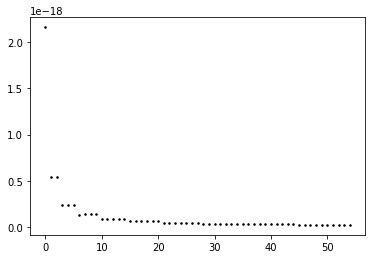

In [101]:
diff = np.zeros(length)
for i in range(0, length):
    diff[i] = fs[i] - dira[i]
    
plt.plot(diff, 'k.', ms = 3)

In [102]:
dira

array([-2.16390805e-18, -5.37038064e-19, -5.40993137e-19, -2.36933526e-19,
       -2.39563015e-19, -2.40442722e-19, -1.32293844e-19, -1.34260527e-19,
       -1.34919301e-19, -1.35249292e-19, -8.40422830e-20, -8.56112789e-20,
       -8.61374936e-20, -8.64012046e-20, -8.65596244e-20, -5.79297172e-20,
       -5.92335874e-20, -5.96714283e-20, -5.98909526e-20, -6.00228604e-20,
       -6.01108795e-20, -4.22436775e-20, -4.33581718e-20, -4.37328883e-20,
       -4.39208506e-20, -4.40338212e-20, -4.41092155e-20, -4.41631081e-20,
       -3.21010687e-20, -3.30735308e-20, -3.34009041e-20, -3.35651948e-20,
       -3.36639625e-20, -3.37298882e-20, -3.37770175e-20, -3.38123861e-20,
       -2.51735125e-20, -2.60355051e-20, -2.63260558e-20, -2.64719352e-20,
       -2.65596563e-20, -2.66182175e-20, -2.66600864e-20, -2.66915097e-20,
       -2.67159628e-20, -2.02369860e-20, -2.10106028e-20, -2.12716955e-20,
       -2.14028459e-20, -2.14817295e-20, -2.15343992e-20, -2.15720598e-20,
       -2.16003269e-20, -

In [70]:
fs

array([-2.17602897e-18, -5.44009053e-19, -5.44001811e-19, -2.41780997e-19,
       -2.41778851e-19, -2.41778135e-19, -1.36001471e-19, -1.36000566e-19,
       -1.36000264e-19, -1.36000113e-19, -8.70407879e-20, -8.70403244e-20,
       -8.70401699e-20, -8.70400927e-20, -8.70400463e-20, -6.04449138e-20,
       -6.04446456e-20, -6.04445562e-20, -6.04445115e-20, -6.04444847e-20,
       -6.04444668e-20, -4.44084649e-20, -4.44082960e-20, -4.44082397e-20,
       -4.44082115e-20, -4.44081946e-20, -4.44081834e-20, -4.44081753e-20,
       -3.40002051e-20, -3.40000919e-20, -3.40000542e-20, -3.40000354e-20,
       -3.40000240e-20, -3.40000165e-20, -3.40000111e-20, -3.40000071e-20,
       -2.68643432e-20, -2.68642638e-20, -2.68642373e-20, -2.68642240e-20,
       -2.68642161e-20, -2.68642108e-20, -2.68642070e-20, -2.68642042e-20,
       -2.68642019e-20, -2.17601072e-20, -2.17600492e-20, -2.17600299e-20,
       -2.17600203e-20, -2.17600145e-20, -2.17600106e-20, -2.17600079e-20,
       -2.17600058e-20, -

In [99]:
diff

array([2.16390805e-18, 5.37038064e-19, 5.40993137e-19, 2.36933526e-19,
       2.39563015e-19, 2.40442722e-19, 1.32293844e-19, 1.34260527e-19,
       1.34919301e-19, 1.35249292e-19, 8.40422830e-20, 8.56112789e-20,
       8.61374936e-20, 8.64012046e-20, 8.65596244e-20, 5.79297172e-20,
       5.92335874e-20, 5.96714283e-20, 5.98909526e-20, 6.00228604e-20,
       6.01108795e-20, 4.22436775e-20, 4.33581718e-20, 4.37328883e-20,
       4.39208506e-20, 4.40338212e-20, 4.41092155e-20, 4.41631081e-20,
       3.21010687e-20, 3.30735308e-20, 3.34009041e-20, 3.35651948e-20,
       3.36639625e-20, 3.37298882e-20, 3.37770175e-20, 3.38123861e-20,
       2.51735125e-20, 2.60355051e-20, 2.63260558e-20, 2.64719352e-20,
       2.65596563e-20, 2.66182175e-20, 2.66600864e-20, 2.66915097e-20,
       2.67159628e-20, 2.02369860e-20, 2.10106028e-20, 2.12716955e-20,
       2.14028459e-20, 2.14817295e-20, 2.15343992e-20, 2.15720598e-20,
       2.16003269e-20, 2.16223252e-20, 2.16399319e-20, 1.65983526e-20,
      